In [1]:
# customer churn analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [3]:
churn=pd.read_csv('churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.shape

(7043, 21)

In [5]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# no missing values

In [7]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [8]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# TotalCharges dtype should be changed to float

In [14]:
churn['TotalCharges']=churn['TotalCharges'].str.replace(' ','0')

In [15]:
churn['TotalCharges']=churn['TotalCharges'].astype(np.float64)

# EDA

# Univariate

In [10]:
# categorical
# 'customerID', 'gender', '', 'Partner', 'Dependents', '', 'PhoneService', 'MultipleLines', 
# 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
# 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'

# continuous
# 'SeniorCitizen','tenure','MonthlyCharges','TotalCharges'

In [16]:
churn['customerID'].value_counts()

0320-JDNQG    1
7977-HXJKU    1
7801-CEDNV    1
2874-YXVVA    1
0945-TSONX    1
             ..
6815-ABQFQ    1
0730-BGQGF    1
3348-CFRNX    1
1154-HYWWO    1
9462-MJUAW    1
Name: customerID, Length: 7043, dtype: int64

In [17]:
churn['customerID'].nunique()

7043

In [18]:
# drop customerID

In [19]:
churn['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

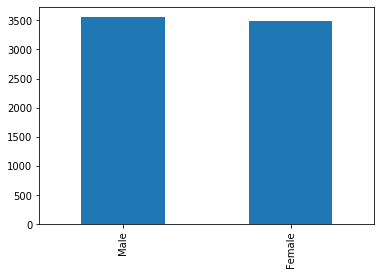

In [21]:
churn['gender'].value_counts().plot.bar()

In [22]:
churn['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

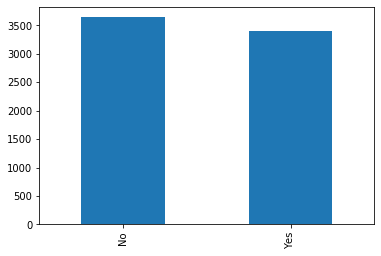

In [23]:
churn['Partner'].value_counts().plot.bar()

In [24]:
churn['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

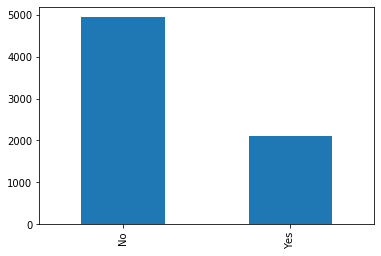

In [25]:
churn['Dependents'].value_counts().plot.bar()

In [26]:
churn['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

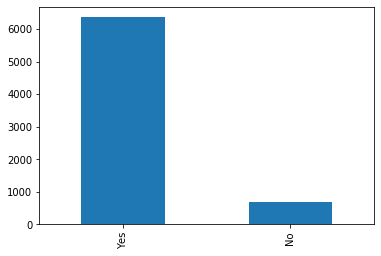

In [27]:
churn['PhoneService'].value_counts().plot.bar()

In [28]:
churn['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

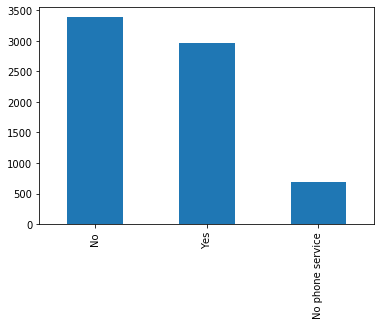

In [29]:
churn['MultipleLines'].value_counts().plot.bar()

In [30]:
churn['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

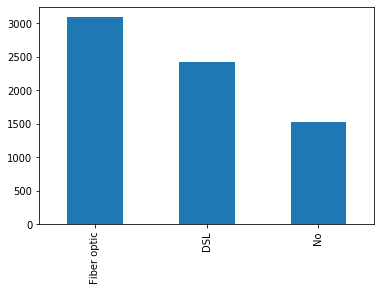

In [31]:
churn['InternetService'].value_counts().plot.bar()

In [32]:
churn['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

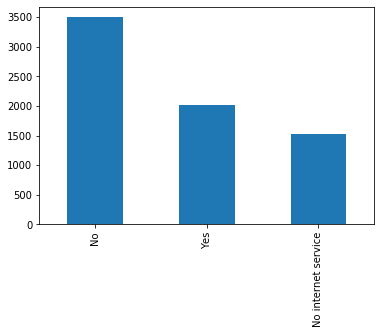

In [33]:
churn['OnlineSecurity'].value_counts().plot.bar()

In [34]:
churn['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

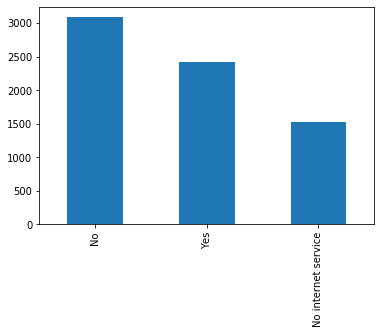

In [35]:
churn['OnlineBackup'].value_counts().plot.bar()

In [36]:
churn['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

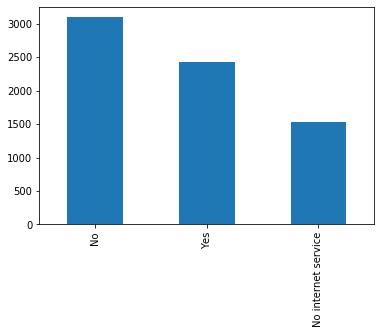

In [37]:
churn['DeviceProtection'].value_counts().plot.bar()

In [38]:
churn['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

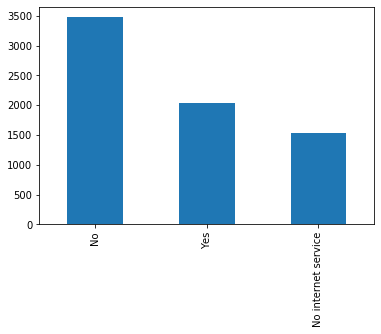

In [39]:
churn['TechSupport'].value_counts().plot.bar()

In [40]:
churn['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

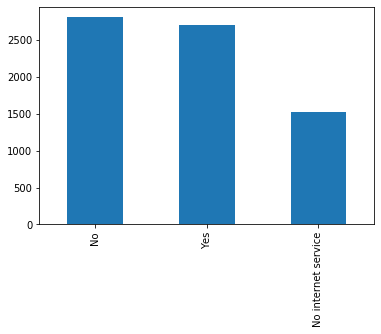

In [41]:
churn['StreamingTV'].value_counts().plot.bar()

In [42]:
churn['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

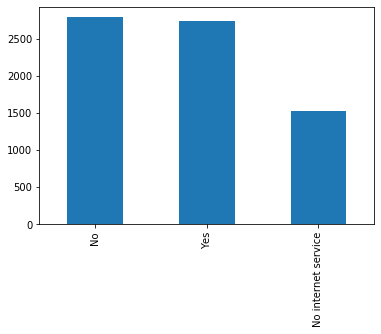

In [43]:
churn['StreamingMovies'].value_counts().plot.bar()

In [44]:
churn['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

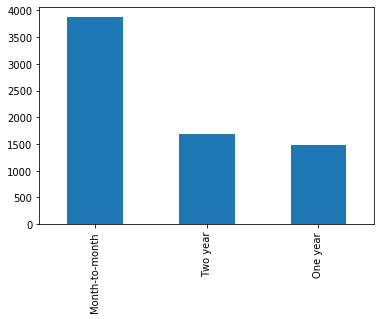

In [45]:
churn['Contract'].value_counts().plot.bar()

In [46]:
churn['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

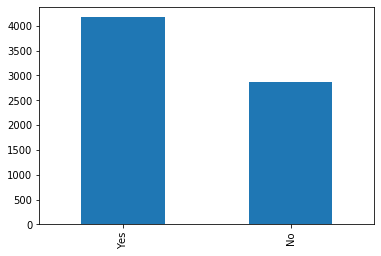

In [47]:
churn['PaperlessBilling'].value_counts().plot.bar()

In [48]:
churn['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

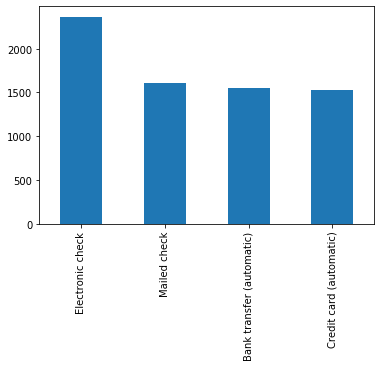

In [49]:
churn['PaymentMethod'].value_counts().plot.bar()

In [50]:
churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

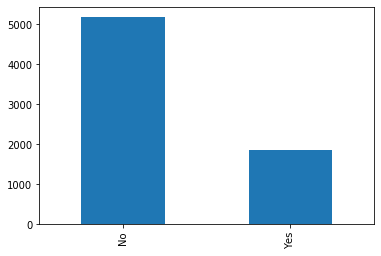

In [51]:
churn['Churn'].value_counts().plot.bar()

In [52]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Bivariate

In [53]:
# categorical
# 'customerID', 'gender', '', 'Partner', 'Dependents', '', 'PhoneService', 'MultipleLines', 
# 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
# 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'

# continuous
# 'SeniorCitizen','tenure','MonthlyCharges','TotalCharges'

In [54]:
churn.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128721,37.569965,61.265124,2549.911442
Yes,0.254682,17.979133,74.441332,1531.796094


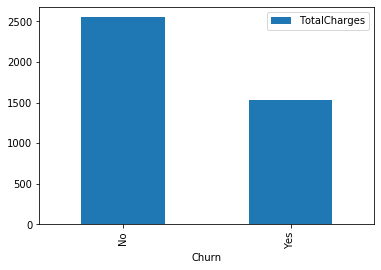

In [55]:
churn.groupby('Churn').mean()[['TotalCharges']].plot.bar()

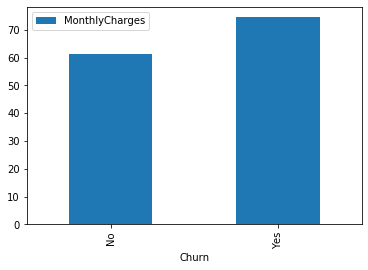

In [56]:
churn.groupby('Churn').mean()[['MonthlyCharges']].plot.bar()

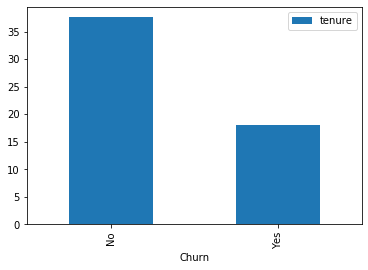

In [58]:
churn.groupby('Churn').mean()[['tenure']].plot.bar()

In [59]:
pd.crosstab(churn['gender'],churn['Churn'])

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


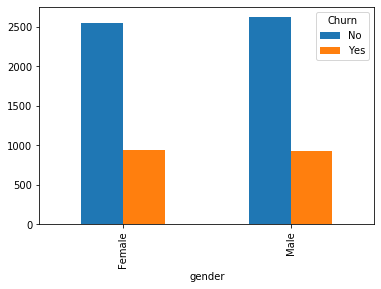

In [61]:
pd.crosstab(churn['gender'],churn['Churn']).plot.bar()

In [60]:
pd.crosstab(churn['Partner'],churn['Churn'])

Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


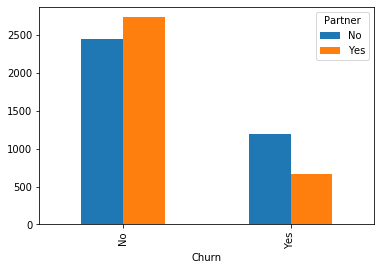

In [62]:
pd.crosstab(churn['Churn'],churn['Partner']).plot.bar()

In [63]:
pd.crosstab(churn['Dependents'],churn['Churn'])

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


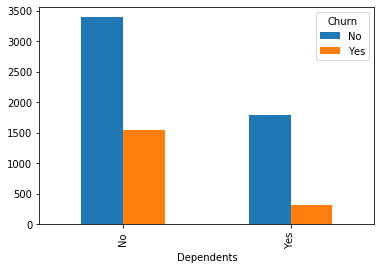

In [64]:
pd.crosstab(churn['Dependents'],churn['Churn']).plot.bar()

In [65]:
pd.crosstab(churn['PhoneService'],churn['Churn'])

Churn,No,Yes
PhoneService,,
No,512,170
Yes,4662,1699


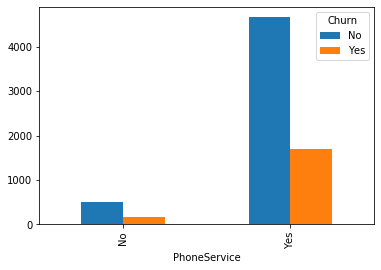

In [66]:
pd.crosstab(churn['PhoneService'],churn['Churn']).plot.bar()

In [67]:
pd.crosstab(churn['MultipleLines'],churn['Churn'])

Churn,No,Yes
MultipleLines,,
No,2541,849
No phone service,512,170
Yes,2121,850


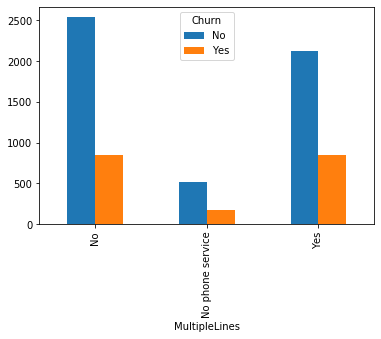

In [68]:
pd.crosstab(churn['MultipleLines'],churn['Churn']).plot.bar()

In [69]:
pd.crosstab(churn['InternetService'],churn['Churn'])

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


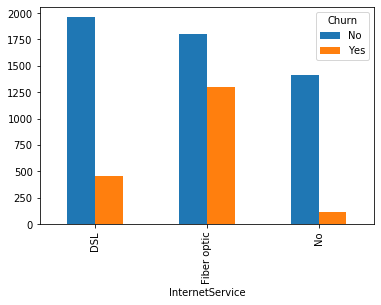

In [70]:
pd.crosstab(churn['InternetService'],churn['Churn']).plot.bar()

In [71]:
pd.crosstab(churn['OnlineSecurity'],churn['Churn'])

Churn,No,Yes
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


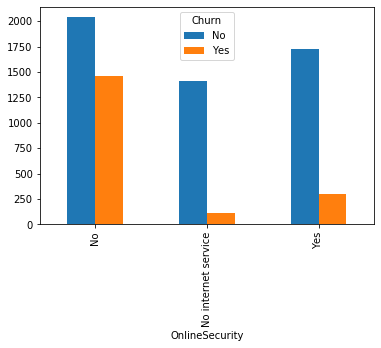

In [72]:
pd.crosstab(churn['OnlineSecurity'],churn['Churn']).plot.bar()

In [73]:
pd.crosstab(churn['OnlineBackup'],churn['Churn'])

Churn,No,Yes
OnlineBackup,,
No,1855,1233
No internet service,1413,113
Yes,1906,523


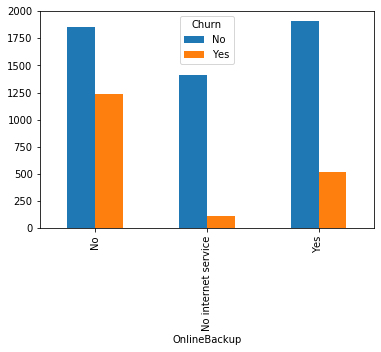

In [74]:
pd.crosstab(churn['OnlineBackup'],churn['Churn']).plot.bar()

In [75]:
pd.crosstab(churn['DeviceProtection'],churn['Churn'])

Churn,No,Yes
DeviceProtection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545


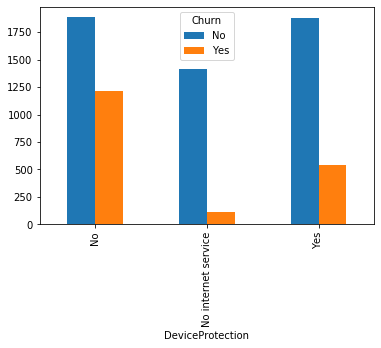

In [76]:
pd.crosstab(churn['DeviceProtection'],churn['Churn']).plot.bar()

In [77]:
pd.crosstab(churn['TechSupport'],churn['Churn'])

Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


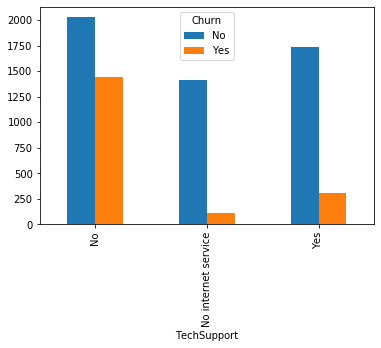

In [78]:
pd.crosstab(churn['TechSupport'],churn['Churn']).plot.bar()

In [79]:
pd.crosstab(churn['StreamingTV'],churn['Churn'])

Churn,No,Yes
StreamingTV,,
No,1868,942
No internet service,1413,113
Yes,1893,814


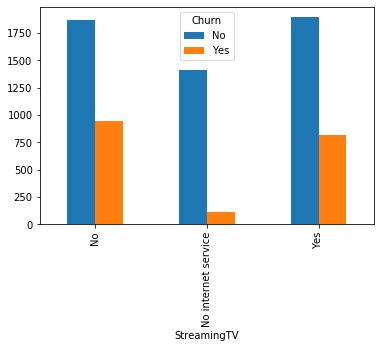

In [80]:
pd.crosstab(churn['StreamingTV'],churn['Churn']).plot.bar()

In [81]:
pd.crosstab(churn['StreamingMovies'],churn['Churn'])

Churn,No,Yes
StreamingMovies,,
No,1847,938
No internet service,1413,113
Yes,1914,818


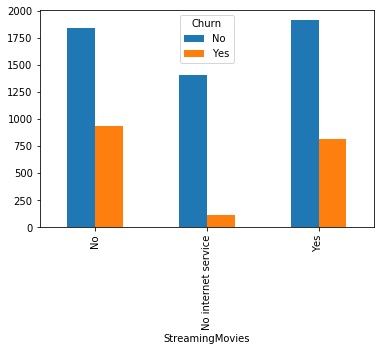

In [82]:
pd.crosstab(churn['StreamingMovies'],churn['Churn']).plot.bar()

In [83]:
pd.crosstab(churn['Contract'],churn['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


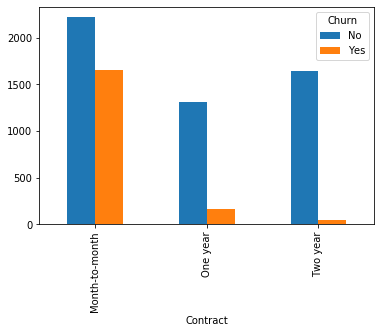

In [84]:
pd.crosstab(churn['Contract'],churn['Churn']).plot.bar()

In [85]:
pd.crosstab(churn['PaperlessBilling'],churn['Churn'])

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


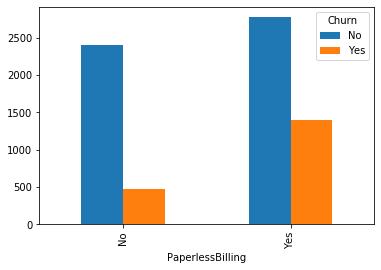

In [86]:
pd.crosstab(churn['PaperlessBilling'],churn['Churn']).plot.bar()

In [87]:
pd.crosstab(churn['PaymentMethod'],churn['Churn'])

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


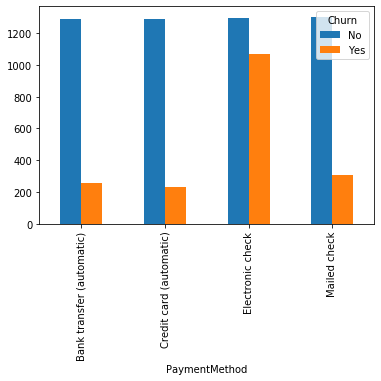

In [88]:
pd.crosstab(churn['PaymentMethod'],churn['Churn']).plot.bar()

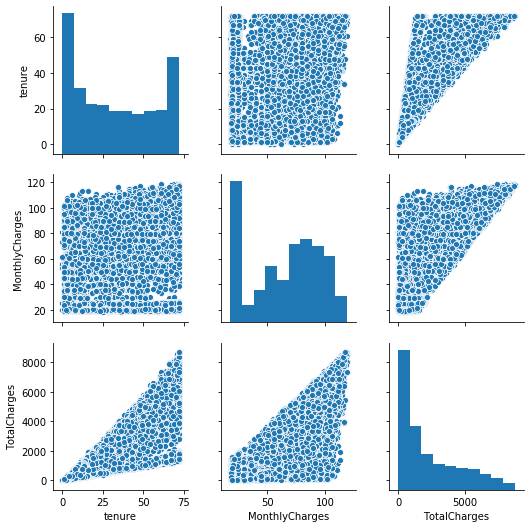

In [90]:
sns.pairplot(churn,vars=['tenure','MonthlyCharges','TotalCharges'])

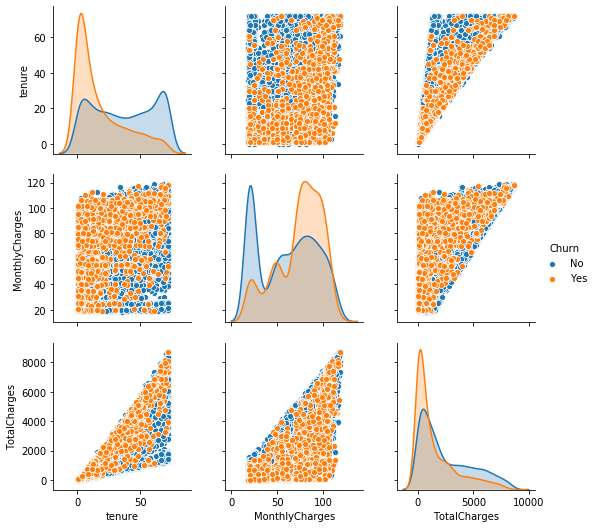

In [91]:
sns.pairplot(churn,vars=['tenure','MonthlyCharges','TotalCharges'],hue='Churn')

# Distribution and corr

In [92]:
# lets encode the labels

In [93]:
from sklearn.preprocessing import LabelEncoder
def le(df,col):
    lab=LabelEncoder()
    df[col]=pd.Series(lab.fit_transform(df[col]))

In [94]:
# categorical
# 'customerID', 'gender', '', 'Partner', 'Dependents', '', 'PhoneService', 'MultipleLines', 
# 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
# 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'

# continuous
# 'SeniorCitizen','tenure','MonthlyCharges','TotalCharges'

In [95]:
le(churn,'gender')
le(churn,'Partner')
le(churn,'Dependents')
le(churn,'PhoneService')
le(churn,'MultipleLines')
le(churn,'InternetService')
le(churn,'OnlineSecurity')
le(churn,'OnlineBackup')
le(churn,'DeviceProtection')
le(churn,'TechSupport')
le(churn,'StreamingTV')
le(churn,'StreamingMovies')
le(churn,'Contract')
le(churn,'PaperlessBilling')
le(churn,'PaymentMethod')
le(churn,'Churn')

In [96]:
churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1452-KIOVK,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,6713-OKOMC,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
8,7892-POOKP,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


In [97]:
churn.drop('customerID',axis=1,inplace=True)

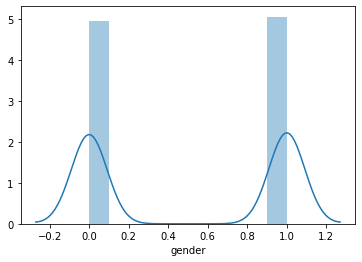

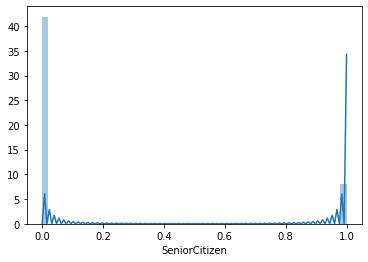

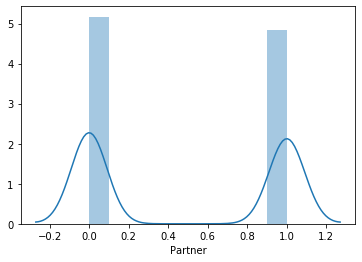

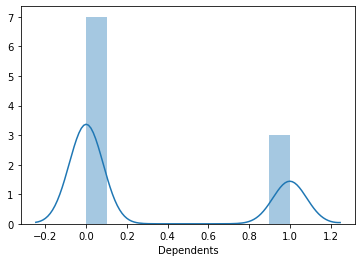

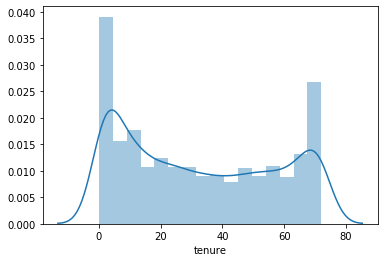

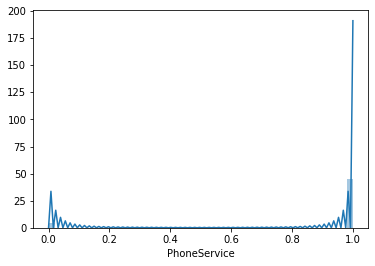

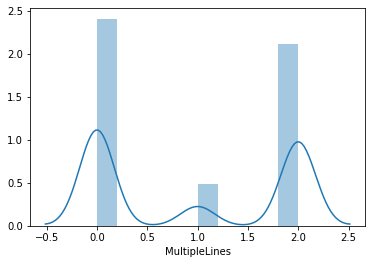

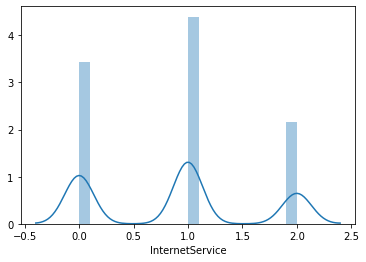

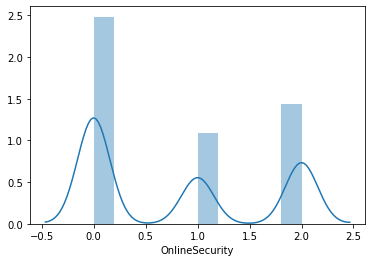

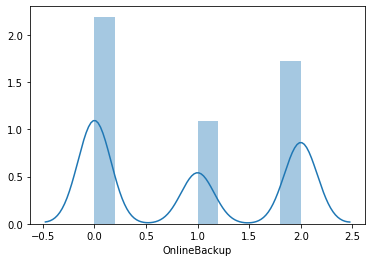

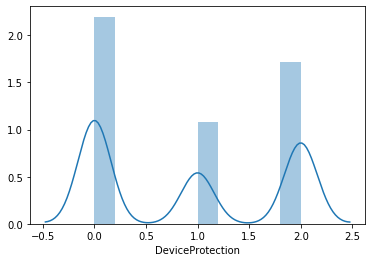

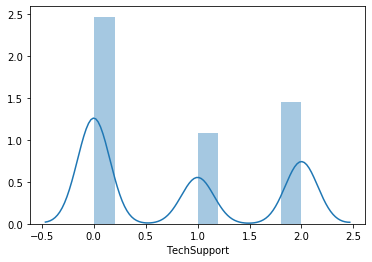

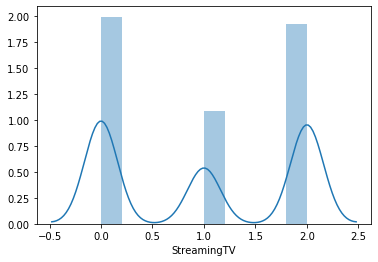

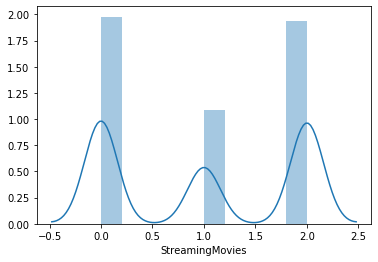

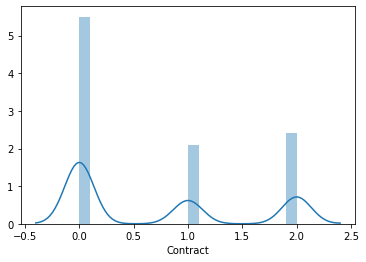

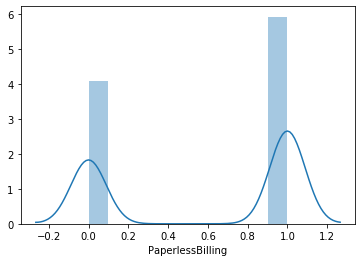

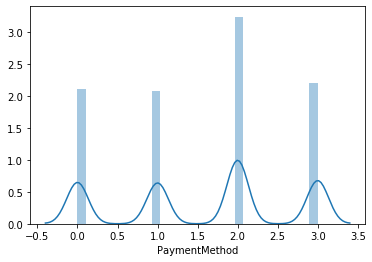

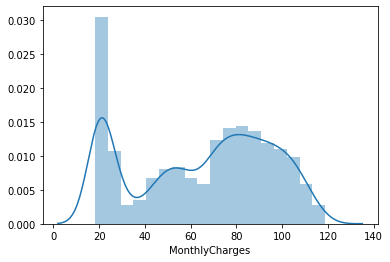

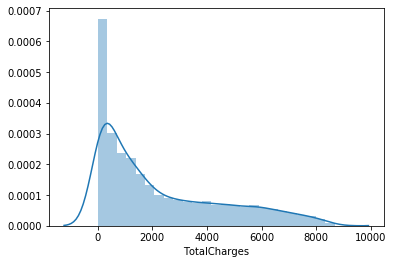

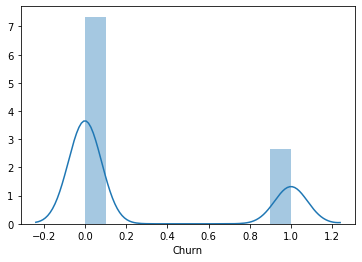

In [98]:
cols=churn.columns.values
# Distplot
for i in cols:
    plt.subplots()
    sns.distplot(churn[i])

In [99]:
churn.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963235
Churn               1.063031
dtype: float64

In [100]:
# skewness in total charges

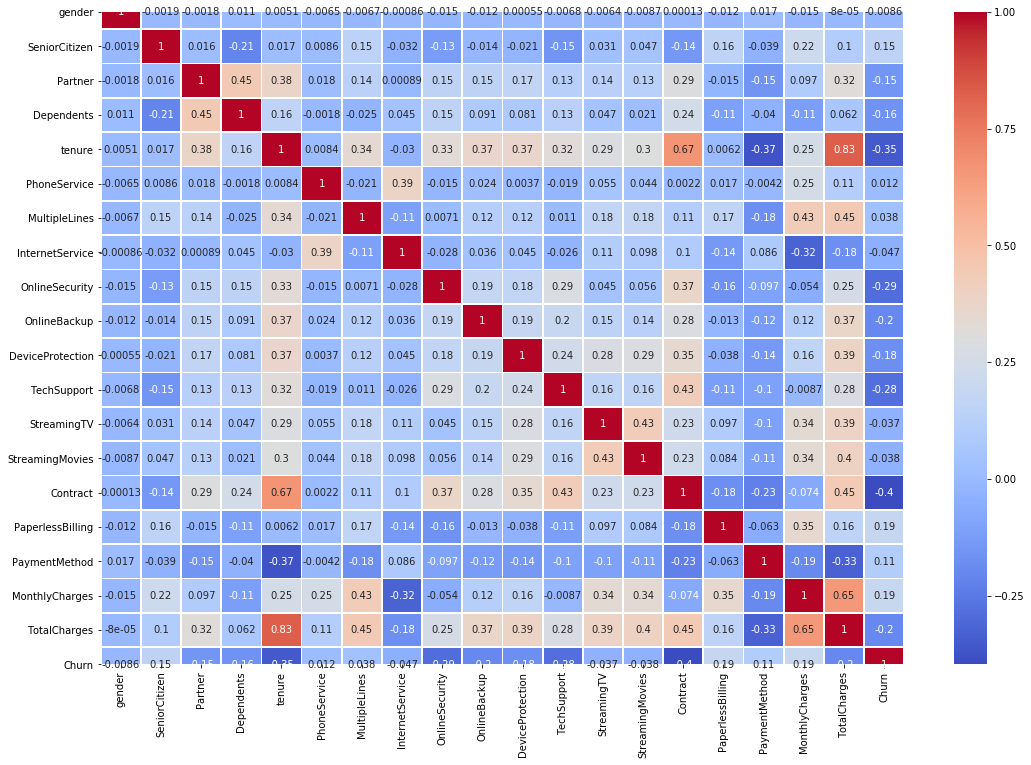

In [102]:
plt.figure(figsize=(18,12))
sns.heatmap(churn.corr(),annot=True,cmap='coolwarm',linewidths=0.8)

In [103]:
# tenure and total charges

# Outliers

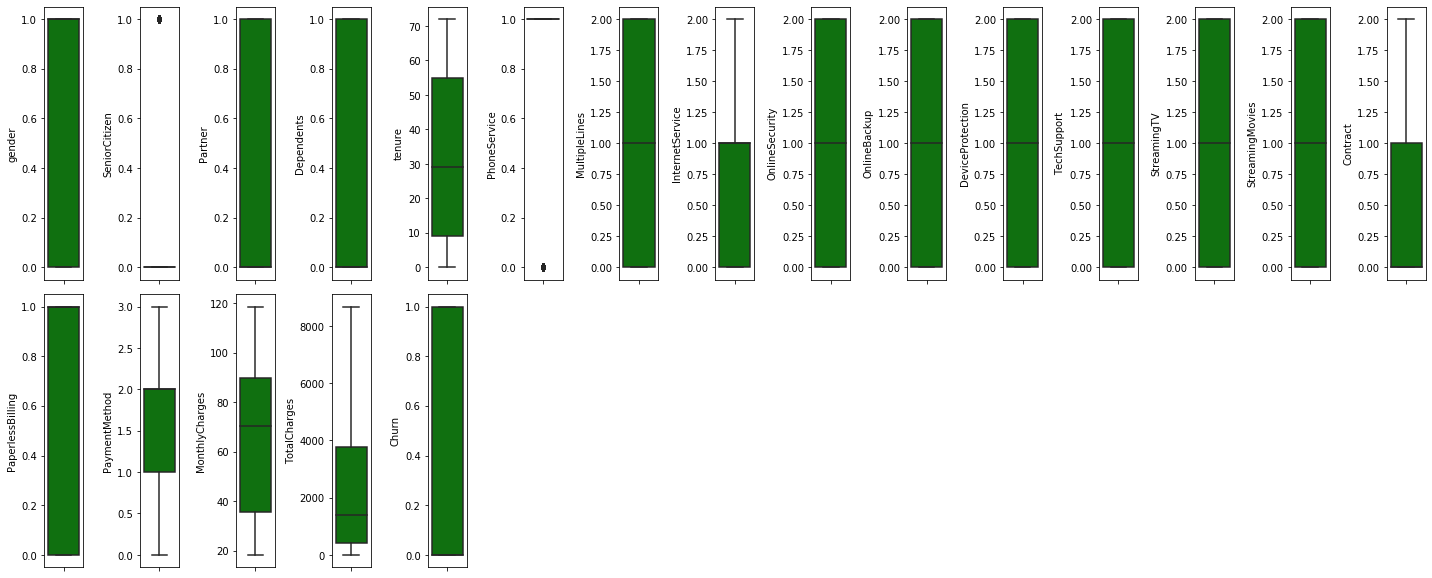

In [105]:
plt.figure(figsize=(20,60))
for i in range(len(cols)):
    plt.subplot(15,15,i+1)
    sns.boxplot(churn[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [106]:
# no outliers

In [107]:
from scipy.stats import zscore
z=np.abs(zscore(churn))
len(np.where(z>3)[0])

682

In [109]:
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [110]:
# the outliers belong to a single feature
# removing the outlier would remove an entire class

In [108]:
# using IQR method
def outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out=(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return(df_out.sum())

def lower(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower=Q1 - 1.5 * IQR
    return lower

def upper(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper=Q3 + 1.5 * IQR
    return upper

def treat_outlier(df,col):
    for i in range(df.shape[0]):
        if (df[col].iloc[i])>upper(df,col):
            df[col].iloc[i]=upper(df,col)
        elif (df[col].iloc[i])<lower(df,col):
            df[col].iloc[i]=lower(df,col)
            
def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return (df.shape)

In [111]:
outlier(churn)

gender                 0
SeniorCitizen       1142
Partner                0
Dependents             0
tenure                 0
PhoneService         682
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [112]:
# outliers are a whole category of that feature
# we won't remove them

# Definitions

In [113]:
# this is a classification problem with 2 classes

In [114]:
# lets seperate x and y

In [115]:
x=churn.drop('Churn',axis=1)
y=churn['Churn']

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
from sklearn.metrics import roc_curve, roc_auc_score

In [139]:
# Now, let's define some functions to reuse them
def fitc(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    
def get_scorec(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    f=f1_score(pred,y_test)
    return train_score,acc,f

def get_predc(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

def get_metricsc(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    conf=confusion_matrix(pred,y_test)
    clas=classification_report(pred,y_test)
    f1=f1_score(y_test,pred)
    recall=f1_score(pred,y_test)
    precision=f1_score(pred,y_test)
    return acc,f1,recall,precision,conf,clas

from sklearn.model_selection import GridSearchCV
def gridcvc(m,p,x,y):
    gkb=GridSearchCV(m,p,n_jobs=-1,cv=4,verbose=5)
    gkb.fit(x,y)
    return gkb.best_params_


from sklearn.model_selection import RandomizedSearchCV
def randomcvc(m,p,x,y):
    from sklearn.model_selection import RandomizedSearchCV
    gkb=RandomizedSearchCV(estimator=m,param_distributions=p,
                          cv=4,n_iter=80,
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)
    gkb.fit(x,y)
    return gkb.best_params_

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
def bfec(m,x,y,k):
    sf=sfs(m, k_features=k,verbose=5, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    return xbfe

def ffsc(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=4, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    return xffs

from sklearn.decomposition import PCA
def nforpcac(x):
    pca=PCA().fit(x)
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
    plt.xlabel('No of Components')
    plt.ylabel('Variance')
    plt.axhline(y=95, color='r', linestyle='--')
    plt.show()
    
def pcac(m,x,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    return xpca

def crossc(m,x,y,c=5):
    score=cross_val_score(m,x,y,cv=c,n_jobs=-1)
    return (score.mean(), score.std())

from sklearn.preprocessing import StandardScaler
def stdc(x):
    scx=StandardScaler()
    xs=pd.DataFrame(scx.fit_transform(x), columns=x.columns)
    return xs

from sklearn.preprocessing import MinMaxScaler
def mmc(x):
    mm=MinMaxScaler()
    xm=pd.DataFrame(mm.fit_transform(x), columns=x.columns)
    return xm

def modified_bfec(m,x,y,k):
    sf=sfs(m, k_features=k,verbose=5, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xbfe,y,test_size=0.25,random_state=45,stratify=y)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    f=f1_score(pred,y_test)
    return xbfe,train_score,acc,f

def modified_ffsc(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xffs,y,test_size=0.25,random_state=45,stratify=y)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    f=f1_score(pred,y_test)
    return train_score,acc,f

def modified_pcac(m,x,y,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    x_train, x_test, y_train, y_test=train_test_split(xpca,y,test_size=0.25,random_state=45,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    f=f1_score(pred,y_test)
    return acc,f

def ttsc(x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    return x_train, x_test, y_train, y_test

def classification(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    clas=classification_report(pred,y_test)
    return clas

In [118]:
lrc=LogisticRegression(n_jobs=-1,random_state=45)
gnb=GaussianNB()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(random_state=45)
svc=SVC(random_state=45)
knnc=KNeighborsClassifier(n_jobs=-1)
rfc=RandomForestClassifier(n_jobs=-1,random_state=45)
gbc=GradientBoostingClassifier(random_state=45)
xgbc=XGBClassifier(n_jobs=-1,random_state=45)
adac=AdaBoostClassifier(random_state=45)

# Iteration 1

In [119]:
print("LR ", get_scorec(lrc,x,y))
print("DT ", get_scorec(dtc,x,y))
print("SVC ", get_scorec(svc,x,y))
print("KNN ", get_scorec(knnc,x,y))
print("GNB ", get_scorec(gnb,x,y))
print("MNB ", get_scorec(mnb,x,y))
print("RF ", get_scorec(rfc,x,y))
print("GB ", get_scorec(gbc,x,y))
print("XGB ", get_scorec(xgbc,x,y))

LR  (0.8078379401741764, 0.7932992617830777, 0.5844748858447489)
DT  (0.9973494888299886, 0.7257240204429302, 0.4856230031948882)
SVC  (0.9617569102612646, 0.7671777399204998, 0.3211920529801324)
KNN  (0.8360469519121545, 0.7552526973310619, 0.48134777376654636)
GNB  (0.759182127981825, 0.7433276547416241, 0.6007067137809187)
MNB  (0.6597879591063991, 0.6513344690516751, 0.5276923076923076)
RF  (0.9769026883756153, 0.7688813174332766, 0.47887323943661975)
GB  (0.8311245740249905, 0.794434980124929, 0.565947242206235)
XGB  (0.9390382430897387, 0.7881885292447472, 0.5616921269095182)


# Iteration 2

In [120]:
# lets scale the data

In [121]:
xs=stdc(x)

In [122]:
print("LR ", get_scorec(lrc,xs,y))
print("DT ", get_scorec(dtc,xs,y))
print("SVC ", get_scorec(svc,xs,y))
print("KNN ", get_scorec(knnc,xs,y))
print("GNB ", get_scorec(gnb,xs,y))
# print("MNB ", get_scorec(mnb,x,y))
print("RF ", get_scorec(rfc,xs,y))
print("GB ", get_scorec(gbc,xs,y))
print("XGB ", get_scorec(xgbc,xs,y))

LR  (0.8059447179098826, 0.7881885292447472, 0.5737142857142856)
DT  (0.9973494888299886, 0.7262918796138558, 0.48723404255319147)
SVC  (0.8201438848920863, 0.7893242475865985, 0.5436654366543666)
KNN  (0.8349110185535782, 0.7546848381601363, 0.5294117647058824)
GNB  (0.7595607724346838, 0.7450312322544009, 0.6015971606033718)
RF  (0.9774706550549035, 0.7677455990914254, 0.47765006385696046)
GB  (0.8311245740249905, 0.794434980124929, 0.565947242206235)
XGB  (0.9390382430897387, 0.7887563884156729, 0.5633802816901408)


# Iteration 3

In [123]:
# lets remove skewness from TotalCharges

In [124]:
xskew=x.copy()

In [127]:
xskew['TotalCharges'].min(),xskew['TotalCharges'].max()
xskew['TotalCharges']=np.cbrt(xskew['TotalCharges'])
# reduced to 0.0042

In [128]:
xskew.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.004240
dtype: float64

In [129]:
print("LR ", get_scorec(lrc,xskew,y))
print("DT ", get_scorec(dtc,xskew,y))
print("SVC ", get_scorec(svc,xskew,y))
print("KNN ", get_scorec(knnc,xskew,y))
print("GNB ", get_scorec(gnb,xskew,y))
print("MNB ", get_scorec(mnb,xskew,y))
print("RF ", get_scorec(rfc,xskew,y))
print("GB ", get_scorec(gbc,xskew,y))
print("XGB ", get_scorec(xgbc,xskew,y))

LR  (0.8116243847027641, 0.8001135718341851, 0.5738498789346246)
DT  (0.9973494888299886, 0.7262918796138558, 0.4861407249466951)
SVC  (0.8513820522529345, 0.7825099375354913, 0.5289052890528905)
KNN  (0.843241196516471, 0.760931289040318, 0.5317018909899889)
GNB  (0.7627792502839833, 0.7473026689381034, 0.6051464063886424)
MNB  (0.7296478606588414, 0.7211811470755253, 0.5904920767306088)
RF  (0.9765240439227565, 0.7694491766042022, 0.4794871794871795)
GB  (0.8311245740249905, 0.794434980124929, 0.565947242206235)
XGB  (0.9390382430897387, 0.7881885292447472, 0.5616921269095182)


# Iteration 4

In [131]:
# lets scale xskew
xsk=stdc(xskew)

In [132]:
print("LR ", get_scorec(lrc,xsk,y))
print("DT ", get_scorec(dtc,xsk,y))
print("SVC ", get_scorec(svc,xsk,y))
print("KNN ", get_scorec(knnc,xsk,y))
print("GNB ", get_scorec(gnb,xsk,y))
# print("MNB ", get_scorec(mnb,xsk,y))
print("RF ", get_scorec(rfc,xsk,y))
print("GB ", get_scorec(gbc,xsk,y))
print("XGB ", get_scorec(xgbc,xsk,y))

LR  (0.8121923513820523, 0.8001135718341851, 0.5759036144578313)
DT  (0.9973494888299886, 0.7268597387847814, 0.4877529286474973)
SVC  (0.8246876183263915, 0.7876206700738216, 0.5336658354114713)
KNN  (0.8354789852328663, 0.7603634298693924, 0.5352422907488987)
GNB  (0.7627792502839833, 0.7473026689381034, 0.6051464063886424)
RF  (0.9770920106020446, 0.768313458262351, 0.4782608695652174)
GB  (0.8311245740249905, 0.794434980124929, 0.565947242206235)
XGB  (0.9390382430897387, 0.7887563884156729, 0.5633802816901408)


# Conclusion 

In [133]:
# lr with x owing to f1_score 0.8078379401741764, 0.7932992617830777, 0.5844748858447489
# svc with xs 0.8201438848920863, 0.7893242475865985, 0.5436654366543666
# gb with xs 0.8311245740249905, 0.794434980124929, 0.565947242206235

# LogisticRegression

In [134]:
# lr with x owing to f1_score 0.8078379401741764, 0.7932992617830777, 0.5844748858447489

In [135]:
# lrc=LogisticRegression(n_jobs=-1,random_state=45)

In [136]:
# Individual Model Pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [138]:
x.head(1)
# there are 19 features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [140]:
xbfe,train_score,acc,f=modified_bfec(lrc,x,y,10)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    9.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    9.6s finished

[2020-03-30 12:07:52] Features: 18/10 -- score: 0.8042034580216629[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    2.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.2s finished

[2020-03-30 12:07:54] Features: 17/10 -- score: 0.8047724472033021[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:    2.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    2.4s finis

0.80367285119273 0.7989778534923339 0.598639455782313


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    1.5s finished

[2020-03-30 12:08:07] Features: 10/10 -- score: 0.8030689097350114

In [152]:
xbfe1,train_score,acc,f=modified_bfec(lrc,x,y,13)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    2.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    3.0s finished

[2020-03-30 12:12:51] Features: 18/13 -- score: 0.8042034580216629[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    2.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.3s finished

[2020-03-30 12:12:53] Features: 17/13 -- score: 0.8047724472033021[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:    1.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    2.3s finis

0.8040514956455888 0.8023850085178875 0.6000000000000001


[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    2.1s finished

[2020-03-30 12:13:02] Features: 13/13 -- score: 0.8043464115093194

In [151]:
xbfe,train_score,acc,f=modified_bfec(lrc,x,y,18)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    2.8s remaining:    0.4s


0.8076486179477471 0.794434980124929 0.5829493087557603


[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    3.1s finished

[2020-03-30 12:12:37] Features: 18/18 -- score: 0.8042034580216629

In [153]:
# best score is with xbfe1
xbfe1.head(1)

,SeniorCitizen,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85


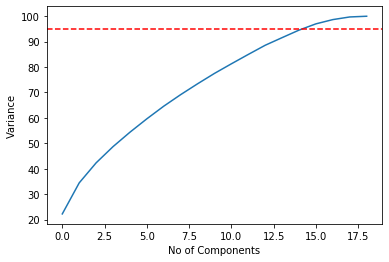

In [154]:
# lets apply pca
nforpcac(xs)

In [155]:
for i in range(13,20):
    print(i, " ", modified_pcac(lrc,xs,y,i))

13   (0.7796706416808632, 0.5358851674641149)
14   (0.7876206700738216, 0.5526315789473685)
15   (0.7876206700738216, 0.5547619047619048)
16   (0.7836456558773425, 0.5458879618593564)
17   (0.7859170925610448, 0.560093348891482)
18   (0.7825099375354913, 0.561282932416953)
19   (0.7881885292447472, 0.5737142857142856)


In [156]:
# we'll use BFE only

In [157]:
# lets tune lrc,xbfe1,y

In [162]:
LogisticRegression?

In [161]:
param_lrc={'dual':[True,False],'fit_intercept':[True,False],'class_weight':['balanced',None],
          'warm_start':[True,False]}
randomcvc(lrc,param_lrc,xbfe1,y)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    6.2s finished


{'warm_start': True,
 'fit_intercept': True,
 'dual': False,
 'class_weight': None}

In [163]:
lrc1=LogisticRegression(n_jobs=-1,random_state=45,warm_start= True)

In [165]:
param_lrc1={'C':[0.1,0.5,0.8,1,1.2,1.4],'max_iter':[75,100,125,150,200],
          'l1_ratio':[0.01,0.05,0.1,0.2,0.3,0.4,0.5]}
randomcvc(lrc1,param_lrc1,xbfe1,y)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    8.2s finished


{'max_iter': 125, 'l1_ratio': 0.05, 'C': 1}

In [166]:
param_lrc2={'C':[0.9,1,1.1,1.3],'max_iter':[100,110,125,130],
          'l1_ratio':[0.01,0.02,0.04,0.05,0.06,0.07]}
randomcvc(lrc1,param_lrc2,xbfe1,y)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    7.8s finished


{'max_iter': 100, 'l1_ratio': 0.01, 'C': 0.9}

In [167]:
lrc2=LogisticRegression(n_jobs=-1,random_state=45,warm_start= True,max_iter= 100, l1_ratio= 0.01, C= 0.9)

In [168]:
get_scorec(lrc2,xbfe1,y)

(0.8040514956455888, 0.8023850085178875, 0.6000000000000001)

In [170]:
lrc3=LogisticRegression(n_jobs=-1,random_state=45,max_iter= 100, l1_ratio= 0.01, C= 0.9)
get_scorec(lrc3,xbfe1,y)

(0.8040514956455888, 0.8023850085178875, 0.6000000000000001)

In [169]:
# the score remained the same

In [182]:
# lets boost lrc2,xbfe1,y
adalrc=AdaBoostClassifier(base_estimator=lrc2, learning_rate=1, n_estimators=150, random_state=45)
get_scorec(adalrc,xbfe1,y)

(0.8065126845891708, 0.7961385576377058, 0.5925085130533486)

In [183]:
# score didn't improve

In [184]:
# lets cross validate
for i in range(2,20):
    print(i, " ", crossc(lrc2,xbfe1,y,i))

2   (0.802498830332679, 0.0007379669415969459)
3   (0.8039192807665589, 0.0024770511764991648)
4   (0.8034916580266053, 0.005106969457705082)
5   (0.8044885579201226, 0.008899634242574613)
6   (0.8032094701782574, 0.00661696568174755)
7   (0.8019300849746182, 0.00935412404989654)
8   (0.8053435942010279, 0.007846001254359232)
9   (0.8034954233917718, 0.009874017547919391)
10   (0.8029252559148276, 0.010537148108860268)
11   (0.8040656098875196, 0.012480867281716611)
12   (0.800796074719461, 0.011290824112998768)
13   (0.8026420517297738, 0.012147154964435764)
14   (0.8020760531354337, 0.014448973524215215)
15   (0.802222814175815, 0.015267598322297384)
16   (0.801651357374592, 0.013838944054318009)
17   (0.8033554959689599, 0.01502176618932697)
18   (0.8020744009235058, 0.013470062831500781)
19   (0.8006543455577635, 0.020409369842054444)


In [185]:
# best score with cv=8

In [186]:
crossplrc=cross_val_predict(lrc2,xbfe1,y,cv=8)

In [187]:
f1_score(y,crossplrc)

0.6056945642795514

In [188]:
# f1_score also improved

In [189]:
# lets evaluate lrc2
acc,f1,recall,precision,conf,clas=(get_metricsc(lrc2,xbfe1,y))
print(acc)
print(f1)
print(recall)
print(precision)
print(conf)
print(clas)

0.8023850085178875
0.6000000000000001
0.6000000000000001
0.6000000000000001
[[1152  206]
 [ 142  261]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1358
           1       0.56      0.65      0.60       403

    accuracy                           0.80      1761
   macro avg       0.72      0.75      0.73      1761
weighted avg       0.81      0.80      0.81      1761



In [190]:
# lets evaluate cross validated lrc2
accp=accuracy_score(y,crossplrc)
confp=confusion_matrix(y,crossplrc)
clasp=classification_report(y,crossplrc)
f1p=f1_score(y,crossplrc)
recallp=f1_score(y,crossplrc)
precisionp=f1_score(y,crossplrc)
print(accp)
print(f1p)
print(recallp)
print(precisionp)
print(confp)
print(clasp)

0.8053386341047849
0.6056945642795514
0.6056945642795514
0.6056945642795514
[[4619  555]
 [ 816 1053]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5174
           1       0.65      0.56      0.61      1869

    accuracy                           0.81      7043
   macro avg       0.75      0.73      0.74      7043
weighted avg       0.80      0.81      0.80      7043



In [191]:
# cross validated model is better

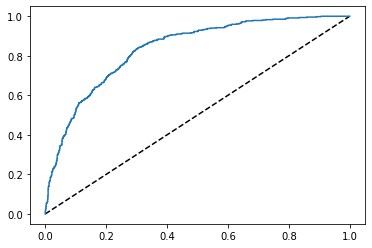

In [248]:
xtr,xte,ytr,yte=ttsc(xbfe1,y)
y_pred_pro=lrc2.predict_proba(xte)[:,1]
fpr,tpr,threshold=roc_curve(yte,y_pred_pro)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr,label='LRC')
plt.show()

In [249]:
roc_auc_score(yte,y_pred_pro)

0.8350474434798726

In [279]:
# lets find auc_roc of cross validated model
cv_results = cross_validate(lrc2,xbfe1,y,cv=8, return_estimator=True)
lrc_fit = cv_results['estimator']
lrc_fit=lrc_fit[0]

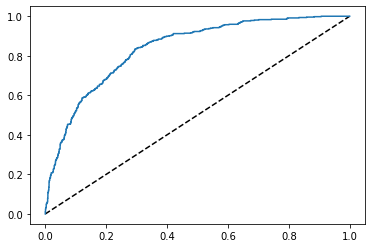

In [280]:
xtr,xte,ytr,yte=ttsc(xbfe1,y)
y_pred_pro=lrc_fit.predict_proba(xte)[:,1]
fpr,tpr,threshold=roc_curve(yte,y_pred_pro)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr,label='LRC_FIT')
plt.show()

In [281]:
roc_auc_score(yte,y_pred_pro)

0.8363597099444314

# SVC

In [192]:
# svc with xs 0.8201438848920863, 0.7893242475865985, 0.5436654366543666

In [193]:
# svc=SVC(random_state=45)

In [194]:
# Individual Model Pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [195]:
xsb,train_score,acc,f=modified_bfec(svc,xs,y,8)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   40.3s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   47.9s finished

[2020-03-30 12:47:10] Features: 18/8 -- score: 0.8005126955711154[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   35.1s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   41.4s finished

[2020-03-30 12:47:52] Features: 17/8 -- score: 0.8006550437511317[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   34.2s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   39.7s finishe

0.8059447179098826 0.7825099375354913 0.5300613496932515


In [196]:
xsb,train_score,acc,f=modified_bfec(svc,xs,y,9)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   36.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   44.1s finished

[2020-03-30 12:53:28] Features: 18/9 -- score: 0.8005126955711154[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   35.8s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   42.1s finished

[2020-03-30 12:54:10] Features: 17/9 -- score: 0.8006550437511317[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   34.0s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   38.9s finishe

0.8068913290420295 0.7773992049971608 0.5333333333333333


In [197]:
xsb,train_score,acc,f=modified_bfec(svc,xs,y,10)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   37.1s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   44.8s finished

[2020-03-30 12:59:26] Features: 18/10 -- score: 0.8005126955711154[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   35.6s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   42.2s finished

[2020-03-30 13:00:08] Features: 17/10 -- score: 0.8006550437511317[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   33.8s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   38.9s finis

0.810109806891329 0.7842135150482681 0.5432692307692307


In [198]:
xsb,train_score,acc,f=modified_bfec(svc,xs,y,11)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   37.0s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   44.8s finished

[2020-03-30 13:04:35] Features: 18/11 -- score: 0.8005126955711154[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   35.3s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   41.3s finished

[2020-03-30 13:05:17] Features: 17/11 -- score: 0.8006550437511317[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   33.7s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   39.3s finis

0.8072699734948883 0.7825099375354913 0.5368802902055623


In [199]:
xsb,train_score,acc,f=modified_bfec(svc,xs,y,12)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   36.6s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   44.0s finished

[2020-03-30 13:09:28] Features: 18/12 -- score: 0.8005126955711154[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   35.7s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   41.8s finished

[2020-03-30 13:10:10] Features: 17/12 -- score: 0.8006550437511317[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   34.1s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   39.6s finis

0.8078379401741764 0.7915956842703009 0.5496932515337424


In [200]:
xsb,train_score,acc,f=modified_bfec(svc,xs,y,13)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   37.1s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   44.8s finished

[2020-03-30 13:14:28] Features: 18/13 -- score: 0.8005126955711154[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   35.1s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   41.3s finished

[2020-03-30 13:15:10] Features: 17/13 -- score: 0.8006550437511317[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   33.5s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   38.2s finis

0.8102991291177585 0.7910278250993753 0.5512195121951219


In [204]:
xsb1,train_score,acc,f=modified_bfec(svc,xs,y,14)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   36.9s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   44.1s finished

[2020-03-30 13:28:26] Features: 18/14 -- score: 0.8005126955711154[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   35.0s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   41.1s finished

[2020-03-30 13:29:07] Features: 17/14 -- score: 0.8006550437511317[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   34.5s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   39.3s finis

0.8120030291556228 0.7915956842703009 0.5518925518925518


In [202]:
xsb,train_score,acc,f=modified_bfec(svc,xs,y,15)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   36.7s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   44.1s finished

[2020-03-30 13:22:16] Features: 18/15 -- score: 0.8005126955711154[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   35.3s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   41.1s finished

[2020-03-30 13:22:57] Features: 17/15 -- score: 0.8006550437511317[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   34.0s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   39.1s finis

0.8114350624763347 0.787052810902896 0.5432399512789281


In [203]:
xsb,train_score,acc,f=modified_bfec(svc,xs,y,16)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   36.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   43.7s finished

[2020-03-30 13:25:13] Features: 18/16 -- score: 0.8005126955711154[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   36.7s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   42.7s finished

[2020-03-30 13:25:56] Features: 17/16 -- score: 0.8006550437511317[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   33.3s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   38.3s finis

0.8152215070049224 0.7859170925610448 0.5408038976857491


In [205]:
# best score at k=14 with xsb1
xsb1.head(1)

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,TechSupport,StreamingTV,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,-1.009559,1.03453,-0.654012,-1.277445,-3.05401,0.062723,-1.183234,-0.918838,-0.925262,-1.113495,-0.828207,0.829798,-1.160323,-0.992611


In [206]:
# lets tune svc with xsb1

In [207]:
SVC?

In [208]:
param_svc={'kernel':['poly','rbf','linear'],'shrinking':[True,False],'probability':[True,False],
          'decision_function_shape':['ovo', 'ovr']}
randomcvc(svc,param_svc,xsb1,y)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  2.1min finished


{'shrinking': True,
 'probability': True,
 'kernel': 'rbf',
 'decision_function_shape': 'ovo'}

In [211]:
svc1=SVC(random_state=45,shrinking= True,
 probability= True,
 kernel= 'rbf',
 decision_function_shape='ovo')

In [212]:
param_svc1={'C':[0.01,0.1,1,2,4,6],'gamma':[0.1,0.4,0.8,1,2,4],'coef0':[0.0,0.1,0.2,0.4]}
randomcvc(svc1,param_svc1,xsb1,y)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 17.2min finished


{'gamma': 0.1, 'coef0': 0.0, 'C': 1}

In [213]:
param_svc2={'C':[0.8,1,1.2,1.4,1.6],'gamma':[0.05,0.08,0.1,0.2,0.4,0.6],'coef0':[0.0,0.1,0.2]}
randomcvc(svc1,param_svc2,xsb1,y)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 12.0min finished


{'gamma': 0.08, 'coef0': 0.1, 'C': 1.2}

In [214]:
param_svc2={'C':[0.9,1,1.1,1.2],'gamma':[0.07,0.08,0.09,0.1],'coef0':[0.0,0.1,0.2]}
randomcvc(svc1,param_svc2,xsb1,y)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:  6.2min finished


{'gamma': 0.08, 'coef0': 0.0, 'C': 1.2}

In [215]:
svc2=SVC(random_state=45,shrinking= True,
 probability= True,
 kernel= 'rbf',
 decision_function_shape='ovo',gamma= 0.08, coef0= 0.0, C= 1.2)
get_scorec(svc2,xsb1,y)

(0.8116243847027641, 0.7904599659284497, 0.5538089480048367)

In [216]:
# score improved

In [221]:
# lets boost it
adasvc=AdaBoostClassifier(base_estimator=svc2, learning_rate=0.01, n_estimators=70, random_state=45)
get_scorec(adasvc,xsb1,y)

(0.8084059068534646, 0.7950028392958546, 0.5481852315394242)

In [222]:
# lets cross validate
for i in range(2,10):
    print(i, " ", crossc(svc2,xsb1,y,i))

2   (0.7956834719758032, 0.0013068744182910819)
3   (0.797671862082081, 0.005449866561723508)
4   (0.8010774497489168, 0.007484883164348963)
5   (0.7995174689262802, 0.011471240329460845)
6   (0.7996590188558271, 0.003638246217855816)
7   (0.8022148002889177, 0.010917768887852519)
8   (0.8022181064694274, 0.00708072338590777)
9   (0.7985247745391147, 0.01072587914672254)


In [223]:
# cv=8 is best

In [224]:
crosspsvc=cross_val_predict(svc2,xsb1,y,cv=8)
f1_score(y,crosspsvc)

0.568062015503876

In [225]:
# f1 score also improved

In [226]:
# lets evaluate cross validated lrc2
accs=accuracy_score(y,crosspsvc)
confs=confusion_matrix(y,crosspsvc)
classs=classification_report(y,crosspsvc)
f1s=f1_score(y,crosspsvc)
recalls=f1_score(y,crosspsvc)
precisions=f1_score(y,crosspsvc)
print(accs)
print(f1s)
print(recalls)
print(precisions)
print(confs)
print(classs)

0.8022149652136874
0.568062015503876
0.568062015503876
0.568062015503876
[[4734  440]
 [ 953  916]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      5174
           1       0.68      0.49      0.57      1869

    accuracy                           0.80      7043
   macro avg       0.75      0.70      0.72      7043
weighted avg       0.79      0.80      0.79      7043



In [227]:
acc,f1,recall,precision,conf,clas=(get_metricsc(svc2,xsb1,y))
print(acc)
print(f1)
print(recall)
print(precision)
print(conf)
print(clas)

0.7904599659284497
0.5538089480048367
0.5538089480048367
0.5538089480048367
[[1163  238]
 [ 131  229]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1401
           1       0.49      0.64      0.55       360

    accuracy                           0.79      1761
   macro avg       0.69      0.73      0.71      1761
weighted avg       0.82      0.79      0.80      1761



In [228]:
# cross validated model is performing better

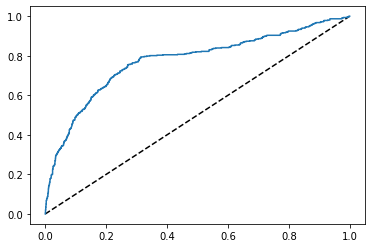

In [250]:
xtr,xte,ytr,yte=ttsc(xsb1,y)
y_pred_pro=svc2.predict_proba(xte)[:,1]
fpr,tpr,threshold=roc_curve(yte,y_pred_pro)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr,label='SVC')
plt.show()

In [251]:
roc_auc_score(yte,y_pred_pro)

0.7742165289310903

# GradientBoosting

In [229]:
# gbc=GradientBoostingClassifier(random_state=45)

In [230]:
# gb with xs 0.8311245740249905, 0.794434980124929, 0.565947242206235

In [231]:
# Individual Model Pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [232]:
xsba,train_score,acc,f=modified_bfec(gbc,xs,y,10)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   25.3s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   29.6s finished

[2020-03-30 19:24:18] Features: 18/10 -- score: 0.806332224107083[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   20.3s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   23.8s finished

[2020-03-30 19:24:42] Features: 17/10 -- score: 0.8076099276506044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   19.4s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   22.1s finish

0.8320711851571374 0.8001135718341851 0.5789473684210525


In [233]:
xsbb,train_score,acc,f=modified_bfec(gbc,xs,y,9)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   21.5s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   25.7s finished

[2020-03-30 19:27:25] Features: 18/9 -- score: 0.806332224107083[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   20.3s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   23.8s finished

[2020-03-30 19:27:49] Features: 17/9 -- score: 0.8076099276506044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   19.1s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   21.8s finished

0.8311245740249905 0.7967064168086314 0.5738095238095238


In [234]:
xsbc,train_score,acc,f=modified_bfec(gbc,xs,y,11)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   22.7s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   27.0s finished

[2020-03-30 19:30:49] Features: 18/11 -- score: 0.806332224107083[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   21.7s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   25.1s finished

[2020-03-30 19:31:14] Features: 17/11 -- score: 0.8076099276506044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   20.6s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   23.3s finish

0.8313138962514199 0.7978421351504826 0.5690072639225181


In [235]:
xsbd,train_score,acc,f=modified_bfec(gbc,xs,y,12)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   21.5s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   25.8s finished

[2020-03-30 19:33:23] Features: 18/12 -- score: 0.806332224107083[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   20.2s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   23.4s finished

[2020-03-30 19:33:46] Features: 17/12 -- score: 0.8076099276506044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   19.6s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   22.1s finish

0.8326391518364256 0.7967064168086314 0.5717703349282296


In [236]:
xsbe,train_score,acc,f=modified_bfec(gbc,xs,y,13)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   21.4s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   25.5s finished

[2020-03-30 19:35:46] Features: 18/13 -- score: 0.806332224107083[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   20.5s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   24.0s finished

[2020-03-30 19:36:10] Features: 17/13 -- score: 0.8076099276506044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   19.2s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   21.8s finish

0.8324498296099963 0.8001135718341851 0.5789473684210525


In [237]:
xsbf,train_score,acc,f=modified_bfec(gbc,xs,y,14)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   21.5s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   25.8s finished

[2020-03-30 19:37:52] Features: 18/14 -- score: 0.806332224107083[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   20.4s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   23.8s finished

[2020-03-30 19:38:16] Features: 17/14 -- score: 0.8076099276506044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   19.1s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   21.8s finish

0.8311245740249905 0.797274275979557 0.5683192261185006


In [238]:
xsbg,train_score,acc,f=modified_bfec(gbc,xs,y,15)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   21.3s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   25.4s finished

[2020-03-30 19:39:43] Features: 18/15 -- score: 0.806332224107083[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   20.6s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   24.3s finished

[2020-03-30 19:40:08] Features: 17/15 -- score: 0.8076099276506044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   19.2s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   21.8s finish

0.8318818629307081 0.7967064168086314 0.5686746987951806


In [239]:
xsbh,train_score,acc,f=modified_bfec(gbc,xs,y,16)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   23.7s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   28.0s finished

[2020-03-30 19:41:20] Features: 18/16 -- score: 0.806332224107083[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   26.0s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   30.8s finished

[2020-03-30 19:41:51] Features: 17/16 -- score: 0.8076099276506044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   22.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   25.5s finish

0.8322605073835668 0.797274275979557 0.5724550898203593


In [240]:
xsbi,train_score,acc,f=modified_bfec(gbc,xs,y,17)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   22.5s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   26.9s finished

[2020-03-30 19:43:08] Features: 18/17 -- score: 0.806332224107083[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   23.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   27.3s finished

[2020-03-30 19:43:36] Features: 17/17 -- score: 0.8076099276506044

0.8332071185157137 0.7978421351504826 0.5741626794258373


In [241]:
xsbj,train_score,acc,f=modified_bfec(gbc,xs,y,18)
print(train_score,acc,f)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:   24.2s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   28.8s finished

[2020-03-30 19:44:08] Features: 18/18 -- score: 0.806332224107083

0.8318818629307081 0.7978421351504826 0.5721153846153846


In [242]:
# best score at k=10 and k=13
# lets compare their metrics

In [243]:
acc,f1,recall,precision,conf,clas=(get_metricsc(gbc,xsba,y))
print(acc)
print(f1)
print(recall)
print(precision)
print(conf)
print(clas)

0.8001135718341851
0.5789473684210525
0.5789473684210525
0.5789473684210525
[[1167  225]
 [ 127  242]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1392
           1       0.52      0.66      0.58       369

    accuracy                           0.80      1761
   macro avg       0.71      0.75      0.72      1761
weighted avg       0.82      0.80      0.81      1761



In [244]:
acc,f1,recall,precision,conf,clas=(get_metricsc(gbc,xsbe,y))
print(acc)
print(f1)
print(recall)
print(precision)
print(conf)
print(clas)

0.8001135718341851
0.5789473684210525
0.5789473684210525
0.5789473684210525
[[1167  225]
 [ 127  242]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1392
           1       0.52      0.66      0.58       369

    accuracy                           0.80      1761
   macro avg       0.71      0.75      0.72      1761
weighted avg       0.82      0.80      0.81      1761



In [245]:
# we'll take k=10

In [246]:
# lets use pca
for i in range(9,20):
    print(i, " ", modified_pcac(gbc,xs,y,i))

9   (0.7802385008517888, 0.5297691373025517)
10   (0.7756956274843839, 0.5280764635603346)
11   (0.7768313458262351, 0.5270758122743682)
12   (0.7796706416808632, 0.5358851674641149)
13   (0.7745599091425327, 0.5199516324062877)
14   (0.7745599091425327, 0.5279429250891796)
15   (0.7819420783645656, 0.548235294117647)
16   (0.7734241908006815, 0.5333333333333334)
17   (0.7728563316297559, 0.5305164319248826)
18   (0.778534923339012, 0.5422535211267606)
19   (0.7808063600227144, 0.5458823529411764)


In [247]:
# lets tune xsba

In [254]:
GradientBoostingClassifier?

In [253]:
param_gb={'loss':['deviance','exponential'],'criterion':['friedman_mse','mse','mae'],'max_features':['auto','sqrt','log2',None],
         'warm_start':[True,False]}
randomcvc(gbc,param_gb,xsba,y)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 21.7min finished


{'warm_start': True,
 'max_features': 'sqrt',
 'loss': 'deviance',
 'criterion': 'friedman_mse'}

In [255]:
gbc1=GradientBoostingClassifier(random_state=45,criterion= 'friedman_mse',
 loss= 'deviance',
 max_features= 'sqrt',
 warm_start= True)

In [257]:
param_gb2={'learning_rate':[0.001,0.01,0.1,1,2],'min_samples_split':[2,3,4,5,8],'min_samples_leaf':[1,2,3,4,6,8],
         'max_depth':[3,5,8,10,12]}
randomcvc(gbc1,param_gb2,xsba,y)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  3.5min finished


{'min_samples_split': 3,
 'min_samples_leaf': 8,
 'max_depth': 3,
 'learning_rate': 0.1}

In [260]:
param_gb3={'learning_rate':[0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5],'min_samples_split':[2,3,4,5,6,7,8],'min_samples_leaf':[1,2,3,4,5,6,7,8],
         'max_depth':[1,2,3,4,5,6,7]}
randomcvc(gbc1,param_gb3,xsba,y)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   57.5s finished


{'min_samples_split': 6,
 'min_samples_leaf': 7,
 'max_depth': 3,
 'learning_rate': 0.1}

In [261]:
gbc2=GradientBoostingClassifier(random_state=45,criterion= 'friedman_mse',
 loss= 'deviance',
 max_features= 'sqrt',
 warm_start= True,learning_rate= 0.1,
 max_depth= 3,
 min_samples_leaf= 7,
 min_samples_split= 6)
get_scorec(gbc2,xsba,y)

(0.8226050738356683, 0.8057921635434412, 0.5918854415274463)

In [262]:
param_gb5={'n_estimators':range(50,500,100)}
gridcvc(gbc2,param_gb5,xsba,y)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    4.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.9s finished


{'n_estimators': 50}

In [263]:
param_gb5={'n_estimators':range(10,250,10)}
gridcvc(gbc2,param_gb5,xsba,y)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   12.2s finished


{'n_estimators': 90}

In [264]:
gbc3=GradientBoostingClassifier(random_state=45,criterion= 'friedman_mse',
 loss= 'deviance',
 max_features= 'sqrt',
 warm_start= True,learning_rate= 0.1,
 max_depth= 3,
 min_samples_leaf= 7,
 min_samples_split= 6,n_estimators= 90)
get_scorec(gbc3,xsba,y)

(0.8220371071563801, 0.8069278818852924, 0.594272076372315)

In [271]:
# score improved
# lets boost gbc3
adagbc=AdaBoostClassifier(base_estimator=gbc3, learning_rate=0.0001, n_estimators=50, random_state=45)
get_scorec(adagbc,xsba,y)

(0.8235516849678152, 0.8103350369108461, 0.6023809523809525)

In [272]:
# score improved
# lets cross validate adagbc
for i in range(2,10):
    print(i, " ", crossc(adagbc,xsba,y,i))

2   (0.8047707911692656, 0.0006822051386013439)
3   (0.8029244384376059, 0.002353755084476186)
4   (0.8049115478478043, 0.0035046389384139165)
5   (0.8066161133902625, 0.007581542860762949)
6   (0.802215111699622, 0.003843547146039298)
7   (0.8044851898680269, 0.010353634271022757)
8   (0.8046312676096972, 0.009409890173214416)
9   (0.8036358760412641, 0.008318710568780984)


In [273]:
crosspgbc=cross_val_predict(adagbc,xsba,y,cv=5)
f1_score(y,crosspgbc)

0.5880217785843921

In [274]:
# lets evaluate cross validated adagbc
accg=accuracy_score(y,crosspgbc)
confg=confusion_matrix(y,crosspgbc)
clasg=classification_report(y,crosspgbc)
f1g=f1_score(y,crosspgbc)
recallg=f1_score(y,crosspgbc)
precisiong=f1_score(y,crosspgbc)
print(accg)
print(f1g)
print(recallg)
print(precisiong)
print(confg)
print(clasg)

0.8066164986511429
0.5880217785843921
0.5880217785843921
0.5880217785843921
[[4709  465]
 [ 897  972]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      5174
           1       0.68      0.52      0.59      1869

    accuracy                           0.81      7043
   macro avg       0.76      0.72      0.73      7043
weighted avg       0.80      0.81      0.80      7043



In [275]:
acc,f1,recall,precision,conf,clas=(get_metricsc(adagbc,xsba,y))
print(acc)
print(f1)
print(recall)
print(precision)
print(conf)
print(clas)

0.8103350369108461
0.6023809523809525
0.6023809523809525
0.6023809523809525
[[1174  214]
 [ 120  253]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1388
           1       0.54      0.68      0.60       373

    accuracy                           0.81      1761
   macro avg       0.72      0.76      0.74      1761
weighted avg       0.83      0.81      0.82      1761



In [276]:
# adagbc is performing better

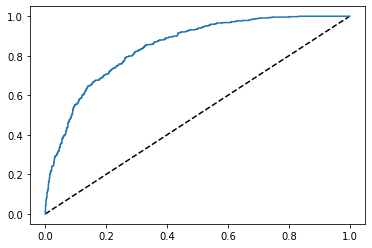

In [277]:
xtr,xte,ytr,yte=ttsc(xsba,y)
y_pred_pro=adagbc.predict_proba(xte)[:,1]
fpr,tpr,threshold=roc_curve(yte,y_pred_pro)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr,label='GBC')
plt.show()

In [278]:
roc_auc_score(yte,y_pred_pro)

0.8452377800356777

# Saving the model

In [282]:
# adagbc is the best model owing to accuracy score and roc_auc_score

In [283]:
pred=get_predc(adagbc,xsba,y)

In [284]:
predic=pd.DataFrame(pred)
predic.to_csv('pred_churn.csv')

In [285]:
import joblib
joblib.dump(adagbc,'adagbc_churn.pkl')

['adagbc_churn.pkl']